In [ ]:
import pandas as pd
rawdata = pd.read_csv('diabetes.csv')
rawdata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
X=rawdata[rawdata.columns[0:-1]] ##X代表八大屬性
Y=rawdata[rawdata.columns[-1]]  ##Y代表糖尿病Lable

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,stratify=Y,random_state=42)  #stratify=y就是按照y中的比例分配
tree = DecisionTreeClassifier(max_depth=5,random_state=1) #max_depth 樹的深度 random_state 固定我們分割的內容
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 0.842
Accuracy on test set: 0.792


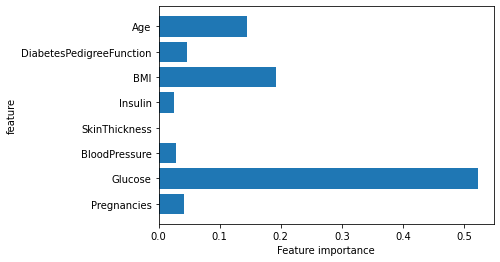

Feature importances:
[0.04073216 0.52225923 0.02783759 0.         0.02527332 0.192749
 0.04664078 0.14450793]


In [ ]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("feature")
    plt.savefig("feature_imporatnace_diabetes.png")
    plt.show()
    plt.close()
plot_feature_importances(tree)
print("Feature importances:\n{}".format(tree.feature_importances_))

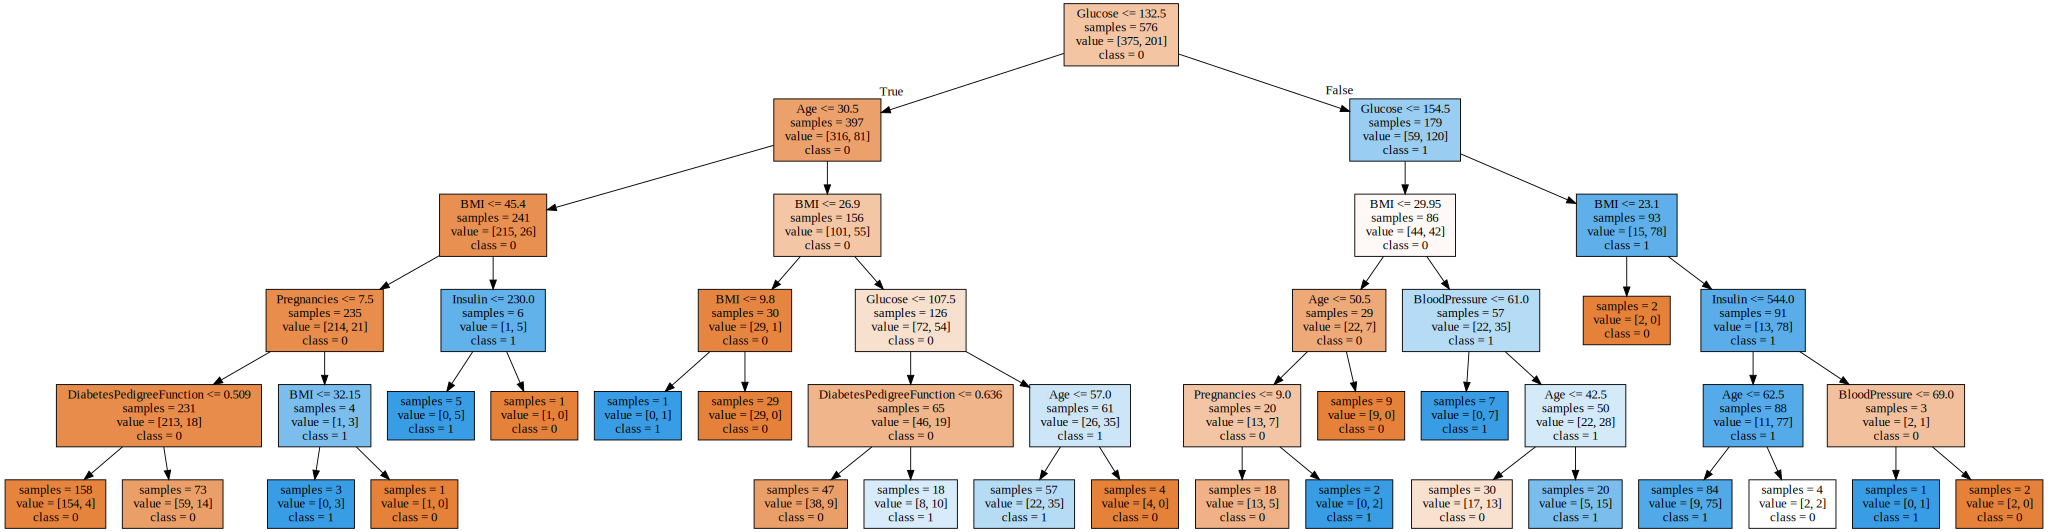

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="diabetes_census_tree.dot",class_names=["0","1"],
feature_names=X.columns,impurity=False,filled=True)
import graphviz
with open("diabetes_census_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
del(X['SkinThickness'])
del(X['BloodPressure'])
del(X['Pregnancies'])
del(X['Insulin'])
del(X['DiabetesPedigreeFunction'])
#del(X['Age'])

In [ ]:
pd.DataFrame(X)

,Glucose,BMI,Age
0,148,33.6,50
1,85,26.6,31
2,183,23.3,32
3,89,28.1,21
4,137,43.1,33
...,...,...,...
763,101,32.9,63
764,122,36.8,27
765,121,26.2,30
766,126,30.1,47


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,stratify=Y,random_state=42)
tree = DecisionTreeClassifier(max_depth=5,random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 0.839
Accuracy on test set: 0.776


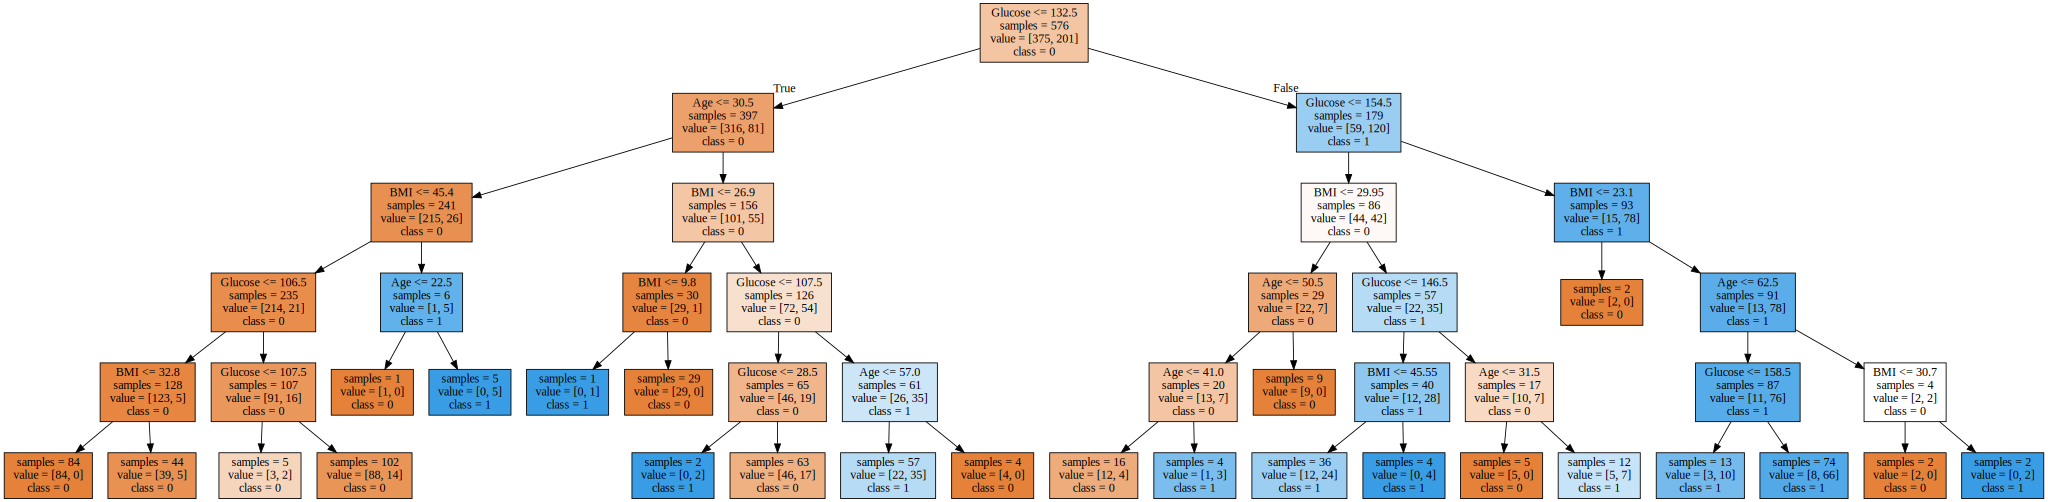

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="diabetes_census_tree.dot",class_names=["0","1"],
feature_names=X.columns,impurity=False,filled=True)
import graphviz
with open("diabetes_census_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
from sklearn.externals import joblib

joblib.dump(tree,'tree.pkl')

tree = joblib.load('tree.pkl')


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
